In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [3]:
data = pd.read_csv("bank-full.csv", delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data_lim = pd.read_csv("bank.csv", delimiter=";")
data_lim

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# **Exploratory Data Analysis (EDA):**

1. Age vs Balance with Term Deposit Subscription

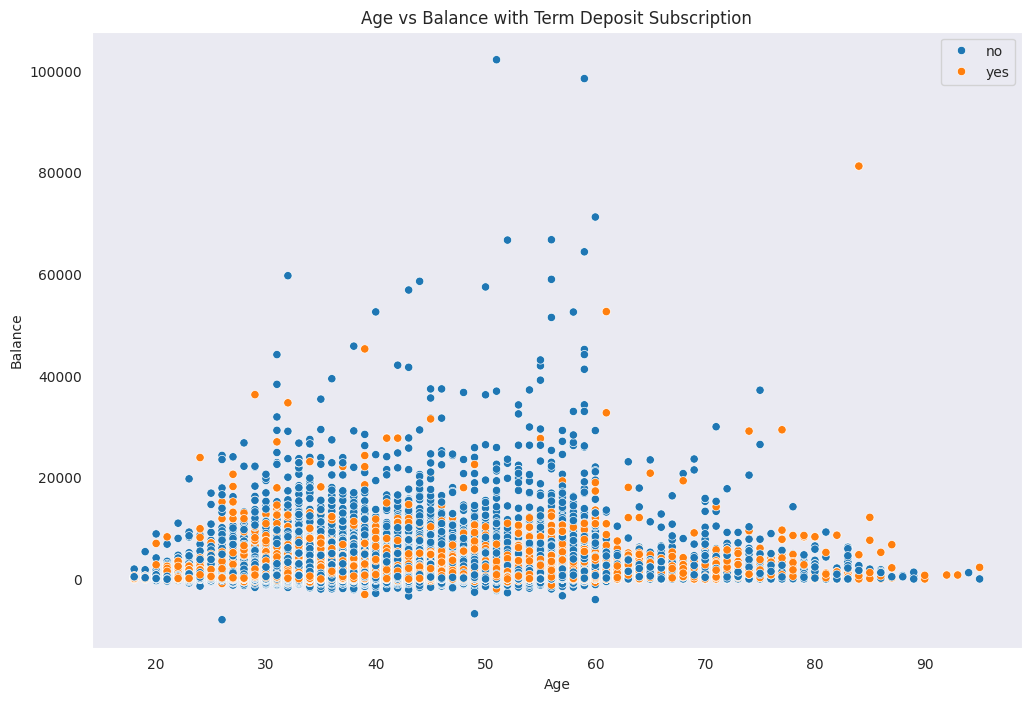

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="age", y="balance", hue="y", data=data)

plt.title("Age vs Balance with Term Deposit Subscription")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()
plt.show()

2. Education, Default, Housing, Loan

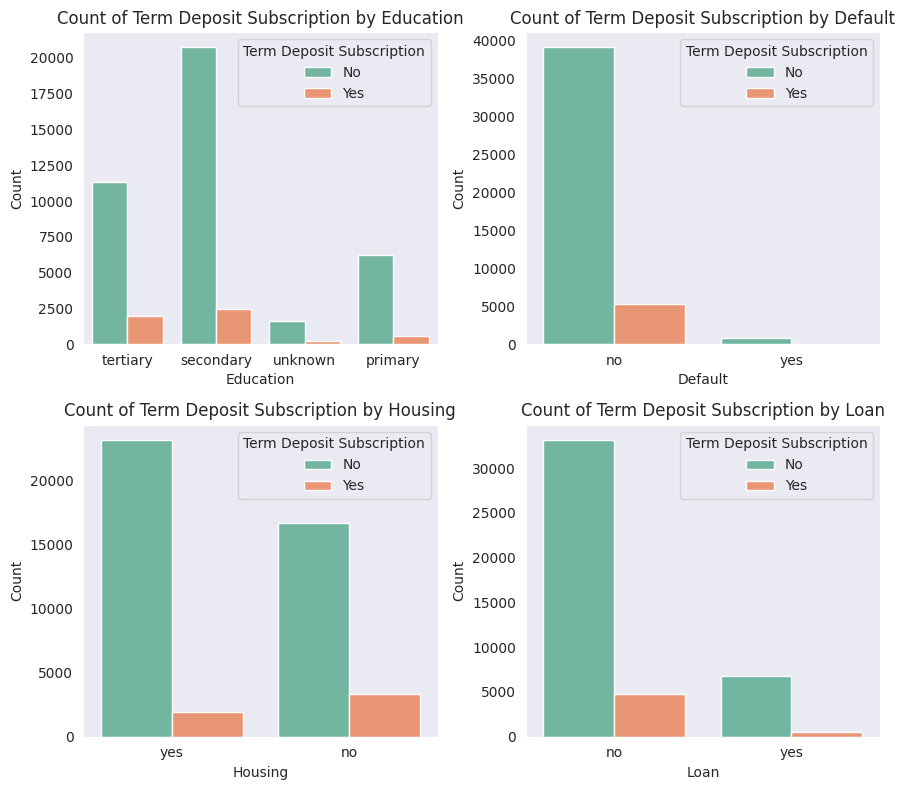

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
categories = ["education", "default", "housing", "loan"]

for ax, category in zip(axes.flatten(), categories):
    sns.countplot(x=category, hue="y", data=data, palette="Set2", ax=ax)
    ax.set_title(f"Count of Term Deposit Subscription by {category.title()}")
    ax.set_xlabel(category.title())
    ax.set_ylabel("Count")
    ax.legend(title="Term Deposit Subscription", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

3. Distribution of Age

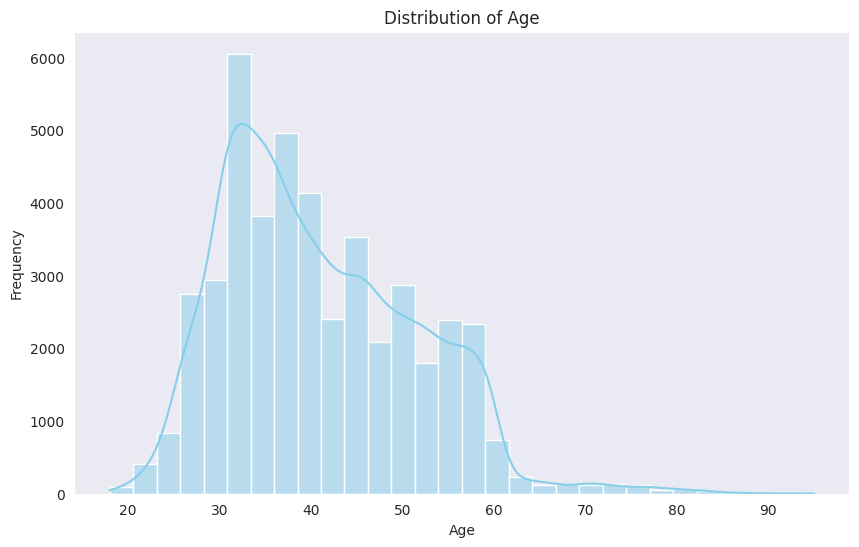

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

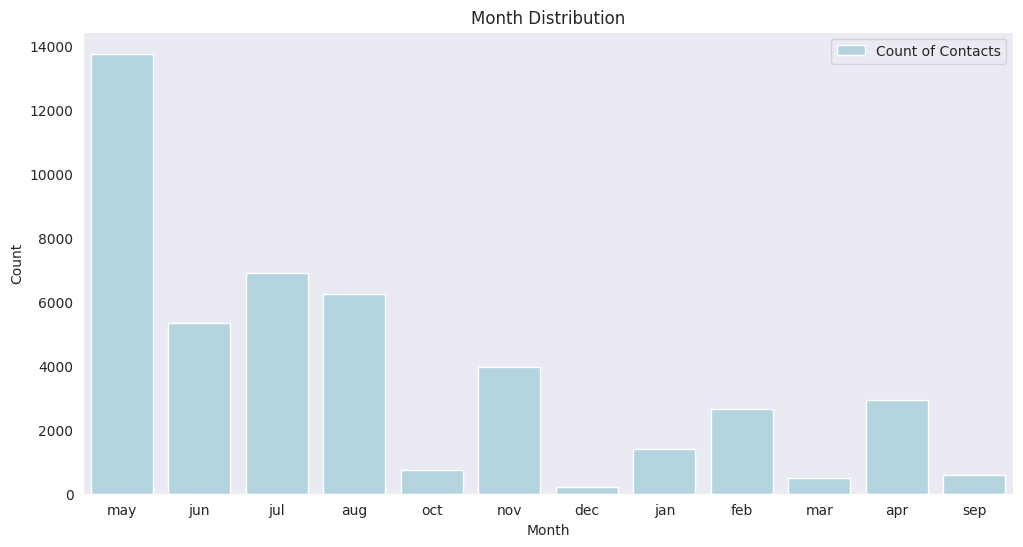

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=data, color="lightblue", label="Count of Contacts")

plt.title("Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

4. General Comparisons

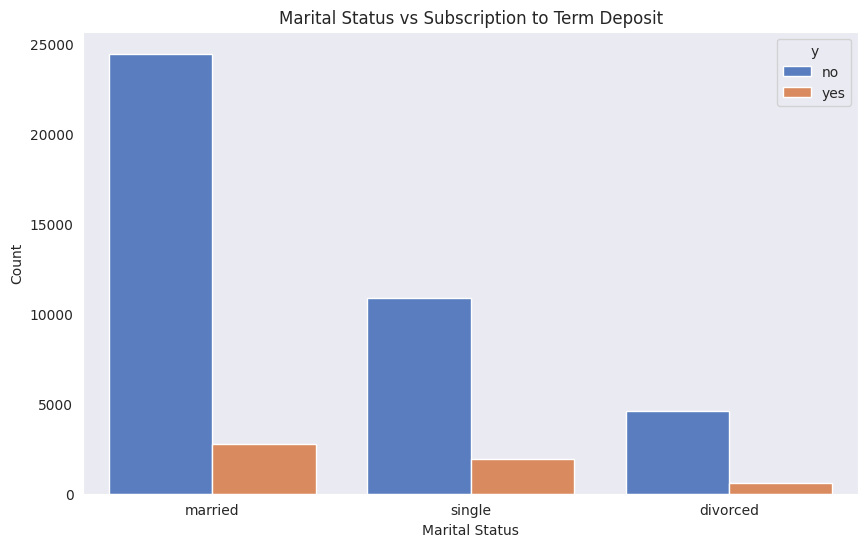

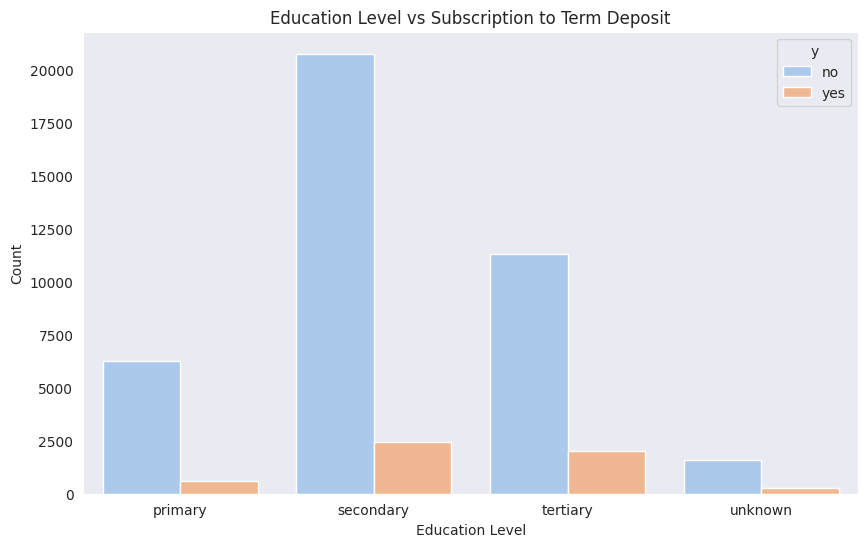

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=data, palette='muted')
plt.title('Marital Status vs Subscription to Term Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=data, palette='pastel', order=['primary', 'secondary', 'tertiary', 'unknown'])
plt.title('Education Level vs Subscription to Term Deposit')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

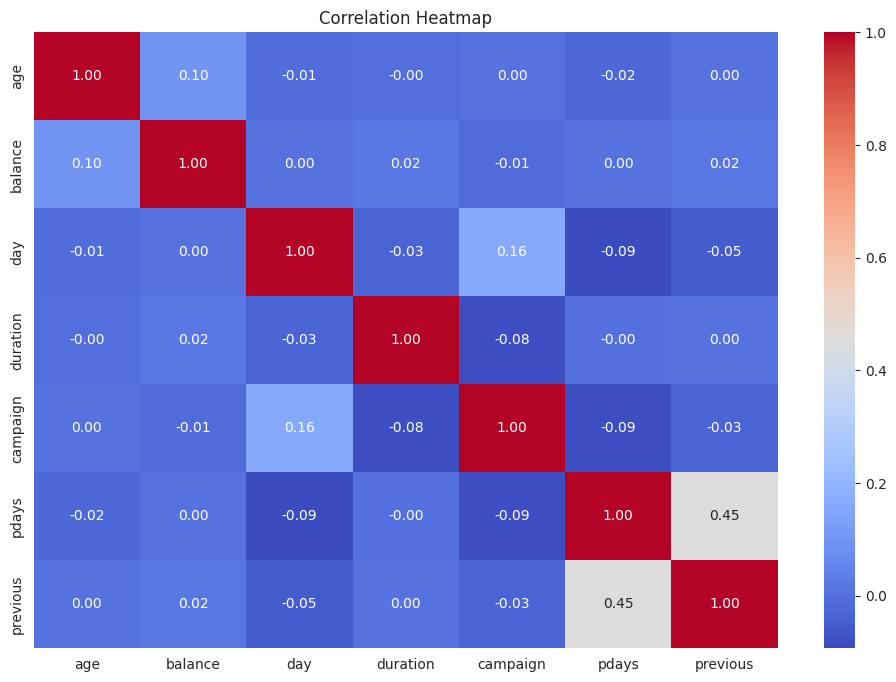

In [9]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()